# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [2]:
# A library for programmatic plot generation.
# A library for data manipulation and analysis.
# LinearRegression from sklearn.

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


Import the unit tests defined for this notebook.

In [3]:
import w2_unittest

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [4]:
path = "data/tvmarketing.csv"

### START CODE HERE ### (~ 1 line of code)
adv = pd.read_csv(path)
### END CODE HERE ###

In [5]:
# Print some part of the dataset.
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [6]:
w2_unittest.test_load_data(adv)

 All tests passed


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

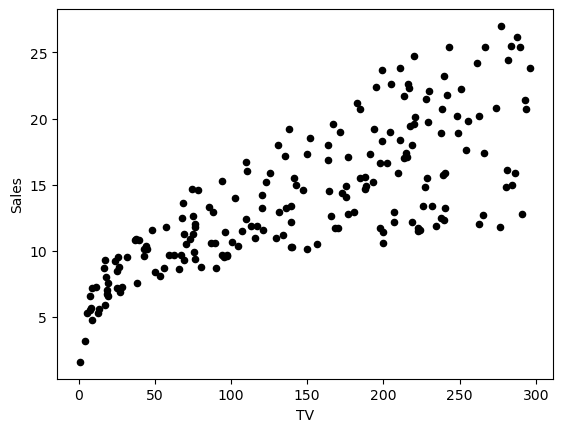

In [7]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [8]:
# Create the required variables
X = np.array(adv['TV'])
Y = np.array(adv['Sales'])

# print some of the values of X and Y
print('Values of X:', X[:5])
print('Values of Y:', Y[:5])

Values of X: [230.1  44.5  17.2 151.5 180.8]
Values of Y: [22.1 10.4  9.3 18.5 12.9]


<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [9]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301973. Intercept: 7.0325935491276965


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [10]:
# This is organised as a function only for grading purposes.
def pred_numpy(m, b, X):
    Y = m*X + b

    return Y

In [11]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [12]:
w2_unittest.test_pred_numpy(pred_numpy)

 All tests passed


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [13]:
lr_sklearn = LinearRegression()

The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [14]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

Shape of X array: (200,)
Shape of Y array: (200,)
Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  3

You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [15]:
X_sklearn = X[:, np.newaxis]
Y_sklearn = Y[:, np.newaxis]

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [16]:

X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=0)


Step 2: Fit the linear regression model to the training data


In [17]:
lr_sklearn.fit(X_train, Y_train)

LinearRegression()

The Out put representation above is in text/plain. Click to more options to change it to the Notebook representation if you want to.


 Step 3: Make predictions using the fitted model on the testing data


In [18]:
Y_pred = lr_sklearn.predict(X_test)

 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [19]:
#Insert your code here
rmse =  np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 3.191579849311344


TO DO Create an estimator object for Random Forest and Desision Trees and compare RSMES:

In [20]:
# To do
#Print out the rank of models From the best to the worst performing and associated RSMES

# get the random forest regressor
rf = RandomForestRegressor(n_estimators=1000, random_state=0)

# fit the model
rf.fit(X_train, Y_train)

# predict the values
Y_pred_rf = rf.predict(X_test)

# calculate the rmse
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))

print("Root Mean Square Error for Random Forest:", rmse_rf)


# get the decision tree regressor
dt = DecisionTreeRegressor(random_state=0)

# fit the model
dt.fit(X_train, Y_train)

# predict the values
Y_pred_dt = dt.predict(X_test)

# calculate the rmse
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

print("Root Mean Square Error for Decision Tree:", rmse_dt)


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Root Mean Square Error for Random Forest: 3.9587943094223057
Root Mean Square Error for Decision Tree: 4.320127312938821


The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [21]:
# compare the ranks of the models

# Create a dictionary of models and their RMSEs
models = {
    'Linear Regression': rmse,
    'Decision Tree': rmse_dt,
    'Random Forest': rmse_rf
}

# Sort the models by their RMSEs
sorted_models = sorted(models.items(), key=lambda x: x[1])

print("Rank of models from best to worst:")
# Print the models and their RMSEs
for model, rmse in sorted_models:
    print(f"{model}: {rmse}")


Rank of models from best to worst:
Linear Regression: 3.191579849311344
Random Forest: 3.9587943094223057
Decision Tree: 4.320127312938821


PS: Avoid running the above code without first rerunning the one that contains **rmse calculations** to ensure that the rmse value is the correct one.

<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [22]:
### START CODE HERE ### (~ 1 line of code)
lr_sklearn.fit(X_sklearn, Y_sklearn)
### END CODE HERE ###

LinearRegression()

In [23]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [24]:
w2_unittest.test_sklearn_fit(lr_sklearn)

 All tests passed


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [25]:
# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)
    ### END CODE HERE ###

    return Y

In [26]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [27]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

 All tests passed


You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

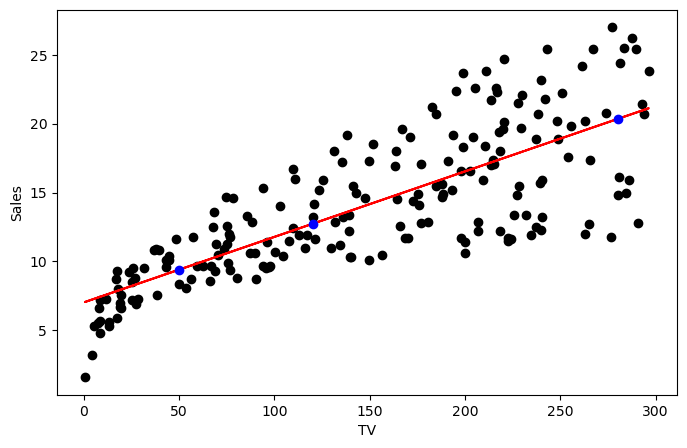

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [29]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

Define cost function according to the equation $(1)$:

In [30]:
def E(m, b, X, Y):
    n = len(X)
    y = m*X + b
    e = (1/(2*n))*np.sum((y - Y)**2)
    return e

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [31]:
def dEdm(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Use the following line as a hint, replacing all None.
    res = (1/len(X))*np.sum((m*X + b - Y)*X)
    ### END CODE HERE ###

    return res


def dEdb(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Replace None writing the required expression fully.
    res = (1/len(X))*np.sum(m*X + b - Y)
    ### END CODE HERE ###

    return res


In [32]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616065
1.687538997430238e-16
0.21777557513839405
5.000000000000001


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [33]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

 All tests passed


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [34]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        ### START CODE HERE ### (~ 2 lines of code)
        m_new = m - learning_rate*dEdm(m, b, X, Y)
        b_new = b - learning_rate*dEdb(m, b, X, Y)
        ### END CODE HERE ###
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

    return m, b

In [35]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.4946040826958948, -1.3668621789975043e-16)
(0.9791767513915026, 4.521910375044022)


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [36]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

 All tests passed


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [37]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.2062999755919659
Cost after iteration 1: 0.19455197461564455
Cost after iteration 2: 0.19408205457659172
Cost after iteration 3: 0.19406325777502959
Cost after iteration 4: 0.1940625059029671
Cost after iteration 5: 0.1940624758280846
Cost after iteration 6: 0.1940624746250893
Cost after iteration 7: 0.19406247457696948
Cost after iteration 8: 0.19406247457504472
Cost after iteration 9: 0.19406247457496772
Cost after iteration 10: 0.19406247457496462
Cost after iteration 11: 0.19406247457496453
Cost after iteration 12: 0.19406247457496448
Cost after iteration 13: 0.19406247457496448
Cost after iteration 14: 0.19406247457496448
Cost after iteration 15: 0.19406247457496448
Cost after iteration 16: 0.19406247457496448
Cost after iteration 17: 0.19406247457496448
Cost after iteration 18: 0.19406247457496448
Cost after iteration 19: 0.19406247457496448
Cost after iteration 20: 0.19406247457496448
Cost after iteration 21: 0.19406247457496448
Cost after iteration 22:

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [38]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]


In [39]:
#What imports do we need for Fast api
%pip install fastapi uvicorn nest-asyncio

Note: you may need to restart the kernel to use updated packages.


In [40]:
#import the required libraries

from distributed import Status
from fastapi import FastAPI
import uvicorn
from pydantic import BaseModel, Field
from deta import Deta


#Create a FastAPI instance
app = FastAPI()

#Create a class for the request body
class TV(BaseModel):
  tv: float = Field(gt=0, lt=10000)


# Define the endpoint
@app.post("/predict", status_code=200)
async def predict_fast_api(request: TV):
  #Make a call to our bes model
  value = request.tv
  tv_sales = lr_sklearn.predict([[value]])
  return tv_sales[0][0]


In [41]:
if __name__ == "__main__":
    config = uvicorn.Config(app, port=8888)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [15900]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


INFO:     Uvicorn running on http://127.0.0.1:8888 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [15900]


In [ ]:
import nest_asyncio

nest_asyncio.apply()
uvicorn.run(app, port = 8888)

You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.